# Projeto 03 - Previsão do uso de Bicicletas Alugada

- Referência da base de dados: 
    - This Hadi Fanaee-T
    - Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal


### importando as bibliotecas

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('seaborn')

### Analise Explorátoria


In [76]:
bikes_df = pd.read_csv('datasets/bike-sharing-daily.csv')
bikes_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
479,480,4/24/2012,2,1,4,0,2,1,1,0.413333,0.454167,0.249383,518,5115,5633
393,394,1/29/2012,1,1,1,0,0,0,1,0.282500,0.311250,0.240050,558,2685,3243
158,159,6/8/2011,2,0,6,0,3,1,1,0.775833,0.622083,0.136817,676,3725,4401
304,305,11/1/2011,4,0,11,0,2,1,1,0.400833,0.683750,0.135571,410,3658,4068
19,20,1/20/2011,1,0,1,0,4,1,2,0.261667,0.538333,0.195904,83,1844,1927


In [77]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [78]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Limpeza de dados

<AxesSubplot:>

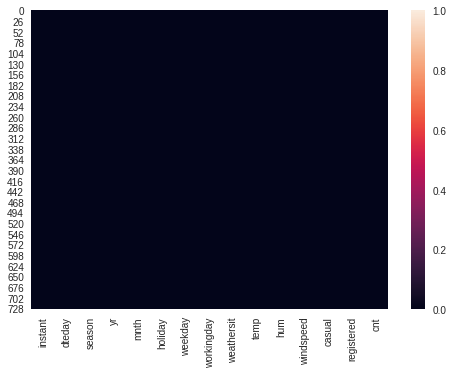

In [79]:
sns.heatmap(bikes_df.isnull(), vmin=0, vmax=1)

In [80]:
#removendo o atributo "instant"

bikes_df = bikes_df.drop(['instant', 'casual', 'registered'], axis=1)
bikes_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [81]:
#convertendo dteday em um atributo de data

bikes_df['dteday'] = pd.to_datetime(bikes_df['dteday'], format='%m/%d/%Y')
bikes_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [82]:
bikes_df.index = pd.DatetimeIndex(bikes_df['dteday'])
bikes_df = bikes_df.drop(['dteday'], axis=1)
bikes_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


### Visualização da base de dados

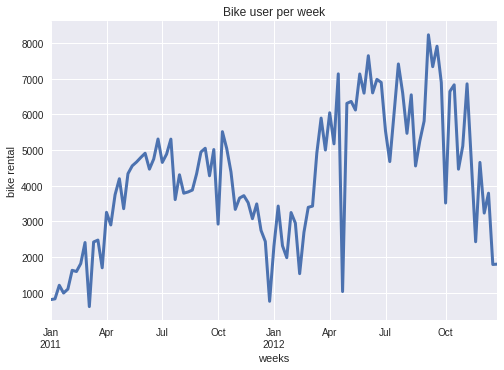

In [83]:
bikes_df['cnt'].asfreq('W').plot(linewidth=3)
plt.title('Bike user per week')
plt.xlabel('weeks')
plt.ylabel('bike rental')
plt.show()

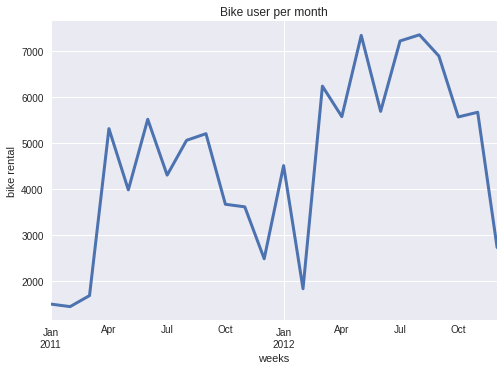

In [84]:
bikes_df['cnt'].asfreq('M').plot(linewidth=3)
plt.title('Bike user per month')
plt.xlabel('weeks')
plt.ylabel('bike rental')
plt.show()

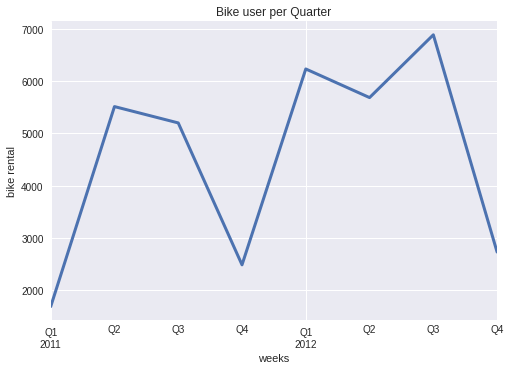

In [85]:
bikes_df['cnt'].asfreq('Q').plot(linewidth=3)
plt.title('Bike user per Quarter')
plt.xlabel('weeks')
plt.ylabel('bike rental')
plt.show()

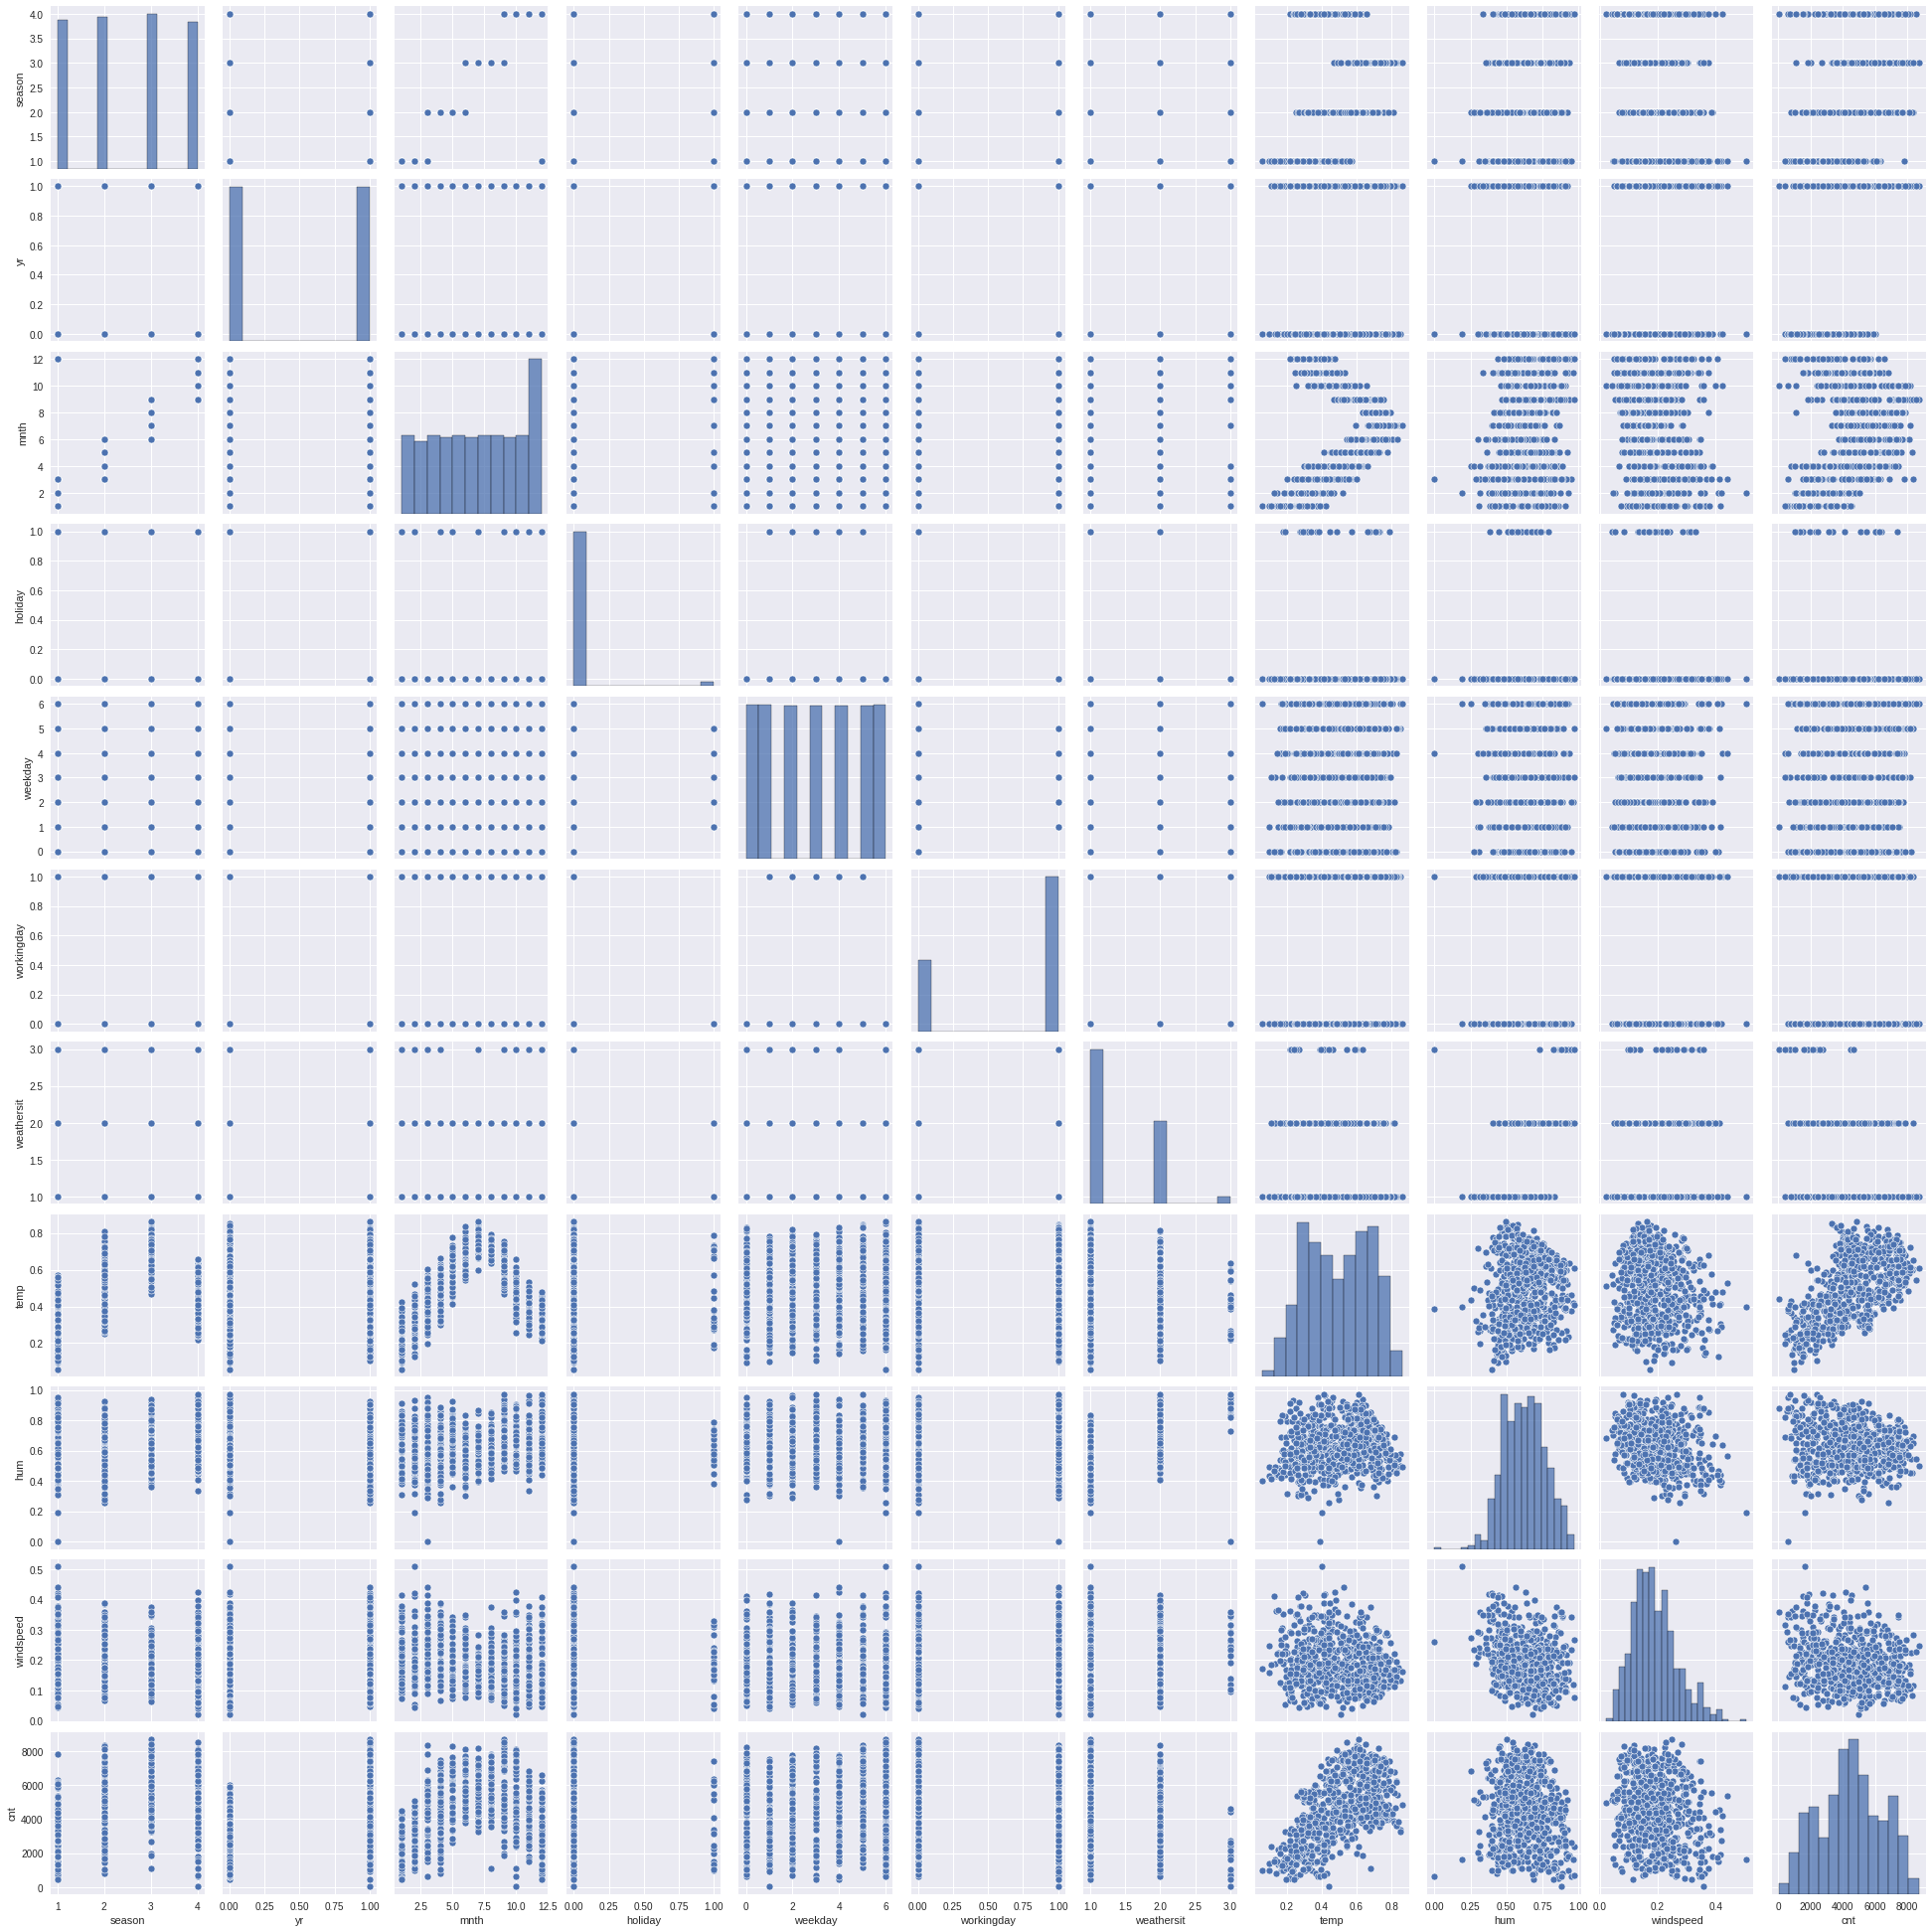

In [86]:
sns.pairplot(bikes_df)
plt.show()

### Tratamento da Base de dados

In [87]:
X_numerical = bikes_df[['temp', 'hum', 'windspeed', 'cnt']]
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


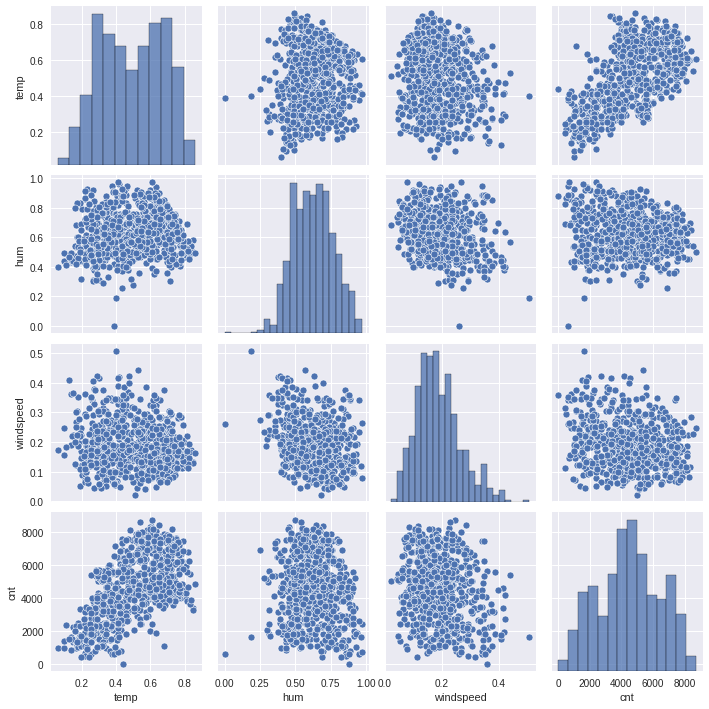

In [88]:
sns.pairplot(X_numerical)

<AxesSubplot:>

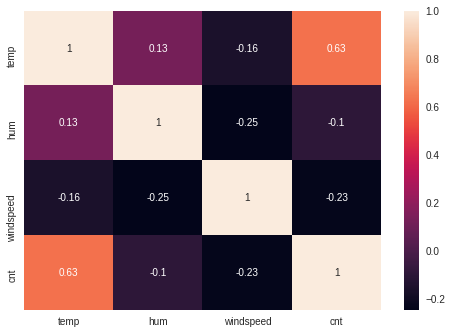

In [89]:
sns.heatmap(X_numerical.corr(), annot=True)

### Tratamento da base de dados

In [90]:
X_categorical = bikes_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
X_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [91]:
#criando variaveis do tipo Dummy
from sklearn.preprocessing import OneHotEncoder

ohte = OneHotEncoder()
X_cat_encode = ohte.fit_transform(X_categorical).toarray()
X_cat_encode

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [92]:
X_cat_encode.shape

(731, 32)

In [93]:
X_cat_encode = pd.DataFrame(X_cat_encode)

In [94]:
X_numerical = X_numerical.reset_index()
X_all = pd.concat([X_cat_encode, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [95]:
X_all.drop(['dteday'], axis=1, inplace=True)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [96]:
X, y= X_all.iloc[:, :-1], X_all.iloc[:, -1]
X.shape, y.shape

((731, 35), (731,))

In [97]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,temp,hum,windspeed
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900


In [98]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((548, 35), (183, 35), (548, 1), (183, 1))

### Construção do modelo

In [251]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='sigmoid', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [264]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 100)               3600      
_________________________________________________________________
dense_112 (Dense)            (None, 1000)              101000    
_________________________________________________________________
dense_113 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dense_114 (Dense)            (None, 100)               100100    
_________________________________________________________________
dense_115 (Dense)            (None, 500)               50500     
_________________________________________________________________
dense_116 (Dense)            (None, 100)               50100     
_________________________________________________________________
dense_117 (Dense)            (None, 1000)            

In [253]:
#from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', loss='mean_squared_error')

In [266]:
y_train

array([[0.47491947],
       [0.81534745],
       [0.37390704],
       [0.44696272],
       [0.57098481],
       [0.52312471],
       [0.38897837],
       [0.48918546],
       [0.63460653],
       [0.38092499],
       [0.42510354],
       [0.62965946],
       [0.75575242],
       [0.47526461],
       [0.74873447],
       [0.53670041],
       [0.71870686],
       [0.49263691],
       [0.84272895],
       [0.19443166],
       [0.38299586],
       [0.43591809],
       [0.78635527],
       [0.89081914],
       [0.54659457],
       [0.50253106],
       [0.37827888],
       [0.45260009],
       [0.43994478],
       [0.46180396],
       [0.33513576],
       [1.        ],
       [0.84307409],
       [0.2364243 ],
       [0.36136677],
       [0.86136677],
       [0.35584445],
       [0.32455131],
       [0.06707317],
       [0.47503451],
       [0.43085596],
       [0.59226875],
       [0.85584445],
       [0.16946618],
       [0.66589968],
       [0.48124712],
       [0.16555453],
       [0.375

In [254]:
epochs_hist = model.fit(X_train, y_train, epochs=25, batch_size=50, validation_split=0.2)

Epoch 1/25
9/9 [==============================] - 0s 16ms/step - loss: 0.3283 - val_loss: 0.0545
Epoch 2/25
9/9 [==============================] - 0s 7ms/step - loss: 0.0746 - val_loss: 0.0365
Epoch 3/25
9/9 [==============================] - 0s 7ms/step - loss: 0.0566 - val_loss: 0.0358
Epoch 4/25
9/9 [==============================] - 0s 7ms/step - loss: 0.0564 - val_loss: 0.0385
Epoch 5/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0510 - val_loss: 0.0313
Epoch 6/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0476 - val_loss: 0.0287
Epoch 7/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0426 - val_loss: 0.0229
Epoch 8/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0379 - val_loss: 0.0158
Epoch 9/25
9/9 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0192
Epoch 10/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0120
Epoch 11/25
9/9 [=====================

### avaliação do modelo

In [255]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

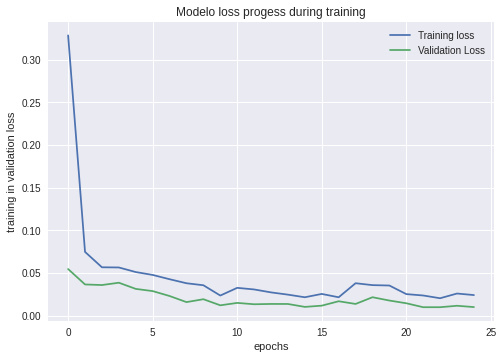

In [256]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Modelo loss progess during training')
plt.xlabel('epochs')
plt.ylabel('training in validation loss')
plt.legend(['Training loss', 'Validation Loss'])

In [257]:
y_predict = model.predict(X_test)

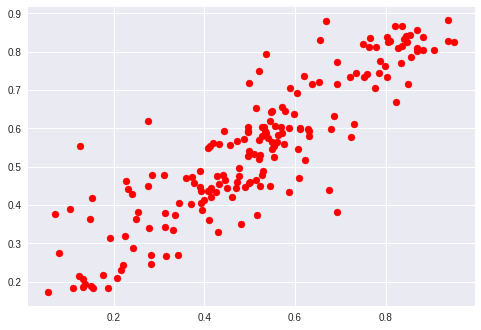

In [258]:
plt.scatter(y_test, y_predict, c='r')

In [259]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [260]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [261]:
k = X_test.shape[1]
n = len(X_test)

In [262]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [263]:
print(f'MAE {mae}')
print(f'MSE {mse}')
print(f'RMSE {rmse}')
print(f'R2 {r2}')
print(f'R2 Ajustado {adj_r2}')

MAE 671.0673908171107
MSE 848834.511947607
RMSE 921.3221542693994
R2 0.7582595245979609
R2 Ajustado 0.7007022685498563
